## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load Dataset

In [2]:
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 3. Exploratory Data Analysis & Visualization

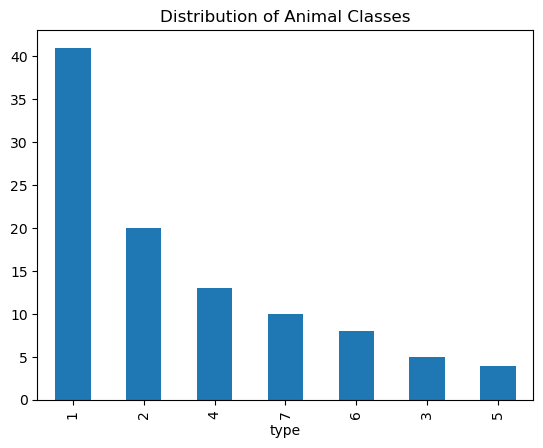

In [3]:
plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Animal Classes')
plt.show()

## 4. Data Preprocessing

In [4]:
# Check missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:

X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

## 5. Train-Test Split (80%-20%)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6. Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Implement KNN Classifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

## 8. Model Evaluation

In [9]:
y_pred = knn.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## Confusion Matrix

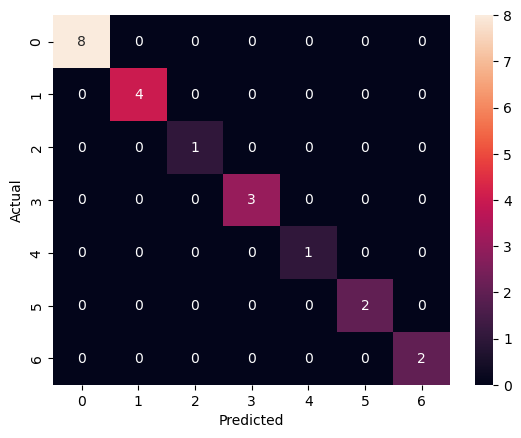

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 9. Decision Boundary Visualization (Using 2 Features)

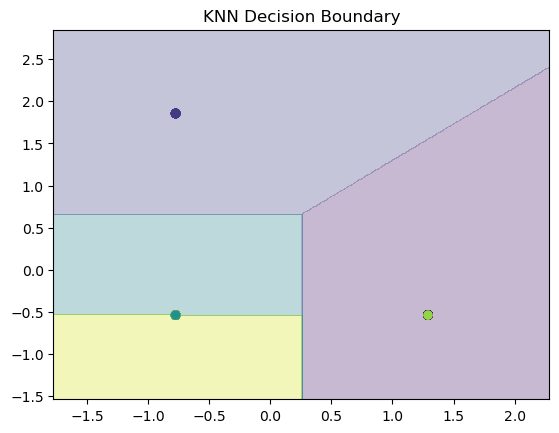

In [11]:
from matplotlib.colors import ListedColormap


X_vis = X.iloc[:, :2].values
y_vis = y.values

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42
)

sc = StandardScaler()
X_train_v = sc.fit_transform(X_train_v)
X_test_v = sc.transform(X_test_v)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_v, y_train_v)

x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_v[:, 0], X_train_v[:, 1], c=y_train_v)
plt.title('KNN Decision Boundary')
plt.show()

In [12]:
# Interview Question

In [13]:
# 1. What are the key hyperparameters in KNN?
# Key Hyperparameters in K-Nearest Neighbors (KNN)

# 1.n_neighbors (K)
# Number of nearest neighbors used to make a prediction.
# Small K → low bias, high variance (overfitting)
# Large K → high bias, low variance (underfitting)

# 2.distance metric (metric)
# Defines how distance between data points is calculated (e.g., Euclidean, Manhattan, Minkowski).
# Affects how “closeness” is measured
# Different metrics work better for different data distributions

# 3.weights
# Determines how neighbors influence the prediction.
# uniform → all neighbors contribute equally
# distance → closer neighbors have more influence

# 4.algorithm
# Method used to compute nearest neighbors (e.g., brute-force, KD-tree, Ball-tree).
# Impacts computational efficiency
# Choice depends on dataset size and dimensionality

# 5.leaf_size
# Controls the size of leaf nodes in tree-based algorithms.
# Affects speed and memory usage
# Does not change prediction accuracy directly

# 6.p (Minkowski parameter)
# Defines the distance formula when using Minkowski distance.
# p = 1 → Manhattan distance
# p = 2 → Euclidean distance

# Impact on Model Performance:
# These hyperparameters control the bias–variance tradeoff, prediction smoothness, and computational efficiency. Proper tuning is essential for good generalization in KNN models.

In [14]:
# 2.What distance metrics can be used in KNN?
# Distance Metrics Used in K-Nearest Neighbors (KNN)

# 1.Euclidean Distance
# Measures straight-line distance between two points.
# Best suited for continuous, scaled numeric data.

# 2.Manhattan Distance (L1)
# Measures distance as the sum of absolute differences along each dimension.
# Useful when data has high dimensionality or grid-like structure.

# 3.Minkowski Distance
# Generalized distance metric that includes Euclidean and Manhattan distances as special cases.
# p = 1 → Manhattan
# p = 2 → Euclidean

# 4.Chebyshev Distance
# Measures the maximum absolute difference along any dimension.
# Useful when the largest difference dominates similarity.

# 5.Cosine Distance
# Measures the angle between two vectors rather than their magnitude.
# Commonly used in text and high-dimensional sparse data.

# 6.Hamming Distance
# Measures the proportion of differing elements between two vectors.
# Suitable for categorical or binary features.

# Important Note:
# Distance metrics are scale-sensitive, so feature scaling (normalization or standardization) is crucial when using KNN.